In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset

col_names = ['Product Name', 'Order Date', 'Ship Date', 'Sales', 'Profit', 'Discount', 'Region', 'Segment', 'Quantity']
df = pd.read_csv("C:/Users/UTC/Downloads/superstore.csv", usecols = col_names, encoding_errors = 'ignore')

In [3]:
# Initial Exploration

df.head()

,Order Date,Ship Date,Segment,Region,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Consumer,South,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Consumer,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Corporate,West,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Consumer,South,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Consumer,South,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Order Date,Ship Date,Segment,Region,Product Name,Sales,Quantity,Discount,Profit
9989,1/21/2014,1/23/2014,Consumer,South,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,2/26/2017,3/3/2017,Consumer,West,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,2/26/2017,3/3/2017,Consumer,West,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,2/26/2017,3/3/2017,Consumer,West,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,5/4/2017,5/9/2017,Consumer,West,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
df.shape

(9994, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Date     9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   Region        9994 non-null   object 
 4   Product Name  9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB


In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Change Data types

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [9]:
# Data Cleaning
# Check for Duplicates

df.duplicated().sum()
df.drop_duplicates(inplace = True)
df[df.duplicated()]

,Order Date,Ship Date,Segment,Region,Product Name,Sales,Quantity,Discount,Profit


In [10]:
# Exploratory Data Analysis (EDA)

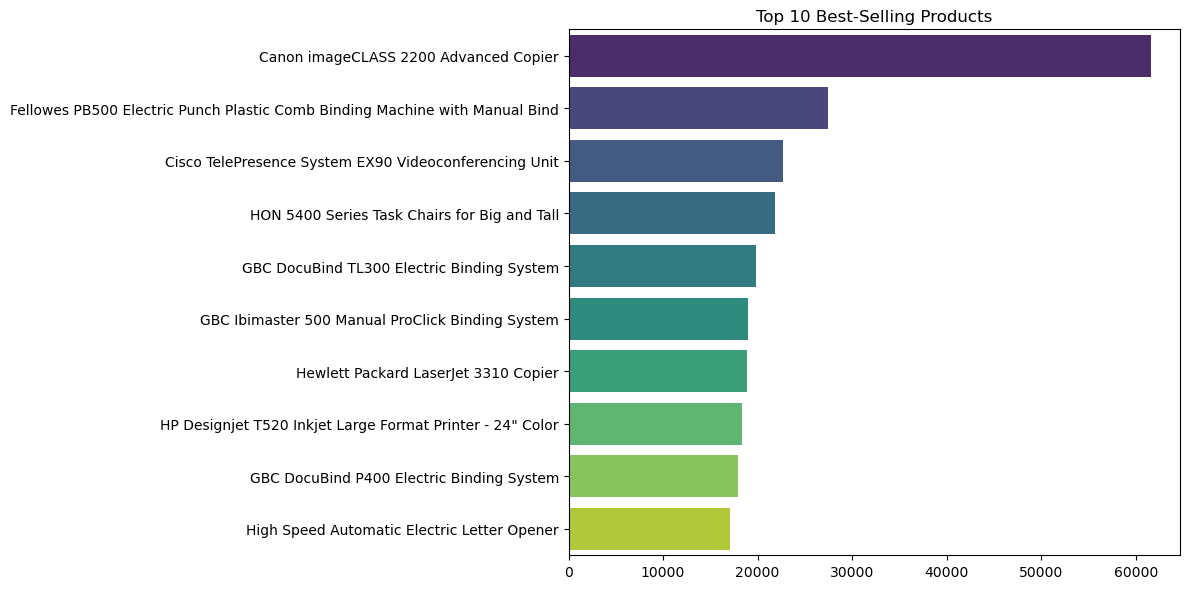

,Product Name,Sales,Profit,Profit Margin,Discount
404,Canon imageCLASS 2200 Advanced Copier,"$61,600","$25,200",41%,12%
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,"$27,453","$7,753",28%,24%
444,Cisco TelePresence System EX90 Videoconferenci...,"$22,638","$-1,811",-8%,50%
786,HON 5400 Series Task Chairs for Big and Tall,"$21,871",$0,0%,20%
686,GBC DocuBind TL300 Electric Binding System,"$19,823","$2,234",11%,30%
688,GBC Ibimaster 500 Manual ProClick Binding System,"$19,024",$761,4%,52%
805,Hewlett Packard LaserJet 3310 Copier,"$18,840","$6,984",37%,20%
787,HP Designjet T520 Inkjet Large Format Printer ...,"$18,375","$4,095",22%,17%
683,GBC DocuBind P400 Electric Binding System,"$17,965","$-1,878",-10%,45%
813,High Speed Automatic Electric Letter Opener,"$17,030",$-262,-2%,7%


In [11]:
# Top 10 Selling Products With Profitability Analysis

# Group by Product Name and Summarize Sales, Profit, and Average Discount
product_sales = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Sort by Sales to get top 10 best-selling products
top_10_sales = product_sales.sort_values(by ='Sales', ascending = False).head(10)

# Calculate Profit Margin (Profit/Sales)
top_10_sales['Profit Margin'] = top_10_sales['Profit'] / top_10_sales['Sales']

# Plot Sales
plt.figure(figsize = (12, 6))
sns.barplot(data = top_10_sales, x = 'Sales', y = 'Product Name', hue = 'Product Name', palette='viridis', legend = False)

plt.title('Top 10 Best-Selling Products')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.savefig("top_products.png", bbox_inches = "tight")
plt.show()

# Format Values for Display (Remove Decimals, Add % and $)
formatted_table = top_10_sales.copy()
formatted_table['Sales'] = formatted_table['Sales'].apply(lambda x: f"${x:,.0f}")
formatted_table['Profit'] = formatted_table['Profit'].apply(lambda x: f"${x:,.0f}")
formatted_table['Profit Margin'] = formatted_table['Profit Margin'].apply(lambda x: f"{x:.0%}")
formatted_table['Discount'] = formatted_table['Discount'].apply(lambda x: f"{x:.0%}")

# Display Formatted Table
"\nTop 10 Selling Products (with Profit, Margin, and Avg. Discount):\n"
formatted_table[['Product Name', 'Sales', 'Profit', 'Profit Margin', 'Discount']]

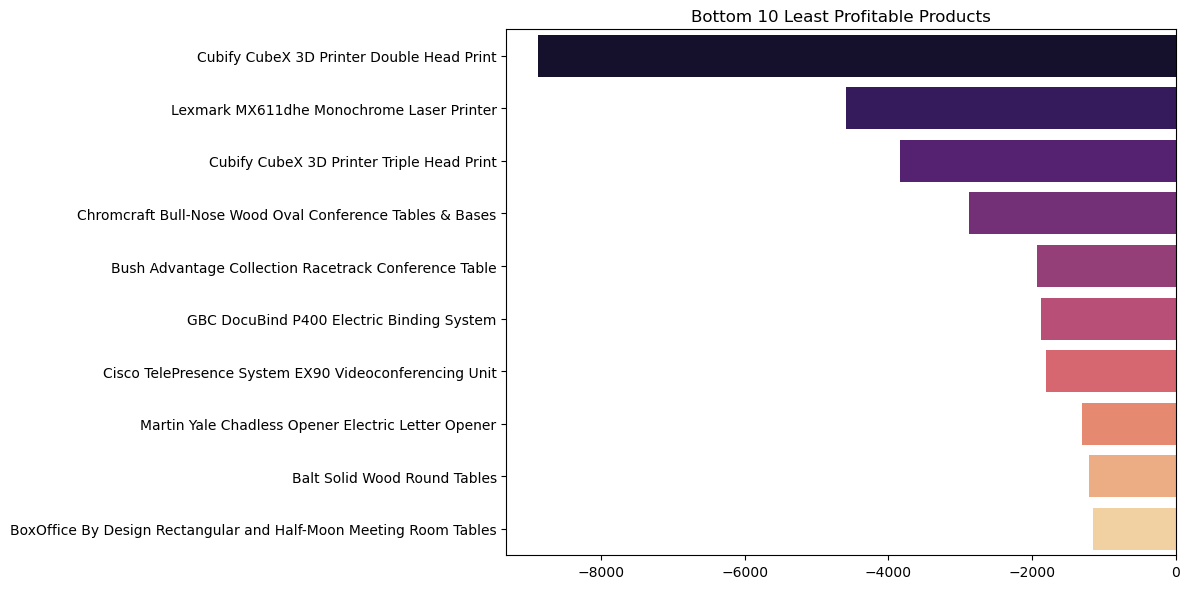

,Product Name,Sales,Profit,Profit Margin,Discount
475,Cubify CubeX 3D Printer Double Head Print,"$11,100","$-8,880",-80%,53%
985,Lexmark MX611dhe Monochrome Laser Printer,"$16,830","$-4,590",-27%,40%
476,Cubify CubeX 3D Printer Triple Head Print,"$8,000","$-3,840",-48%,50%
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,"$9,918","$-2,876",-29%,28%
376,Bush Advantage Collection Racetrack Conference...,"$9,545","$-1,934",-20%,35%
683,GBC DocuBind P400 Electric Binding System,"$17,965","$-1,878",-10%,45%
444,Cisco TelePresence System EX90 Videoconferenci...,"$22,638","$-1,811",-8%,50%
1043,Martin Yale Chadless Opener Electric Letter Op...,"$16,656","$-1,299",-8%,10%
285,Balt Solid Wood Round Tables,"$6,519","$-1,201",-18%,20%
364,BoxOffice By Design Rectangular and Half-Moon ...,"$1,706","$-1,148",-67%,48%


In [12]:
# 10 Least Profitable Products With Profitability Analysis

# Group by Product Name, Sum Sales/Profit, and Average Discount
product_sales = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'  
}).reset_index()

# Calculate Profit Margin
product_sales['Profit Margin'] = product_sales['Profit'] / product_sales['Sales']

# Sort by Profit in ascending order and select bottom 10 least profitable products
bottom_10_profit = product_sales.sort_values(by = 'Profit', ascending = True).head(10)

# Plot Profit for bottom 10 products
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_10_profit, x = 'Profit', y = 'Product Name', hue = 'Product Name', palette = 'magma', legend = False)

plt.title('Bottom 10 Least Profitable Products')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.savefig("least_profitable.png", bbox_inches = "tight")
plt.show()

# Format Values for Display (Remove Decimals, Add % and $)
formatted_table = bottom_10_profit.copy()
formatted_table['Sales'] = formatted_table['Sales'].apply(lambda x: f"${x:,.0f}")
formatted_table['Profit'] = formatted_table['Profit'].apply(lambda x: f"${x:,.0f}")
formatted_table['Profit Margin'] = formatted_table['Profit Margin'].apply(lambda x: f"{x:.0%}")
formatted_table['Discount'] = formatted_table['Discount'].apply(lambda x: f"{x:.0%}")

# Display Formatted Table
"\nBottom 10 Least Profitable Products (with Sales, Margin, and Avg. Discount):\n"
formatted_table[['Product Name', 'Sales', 'Profit', 'Profit Margin', 'Discount']]


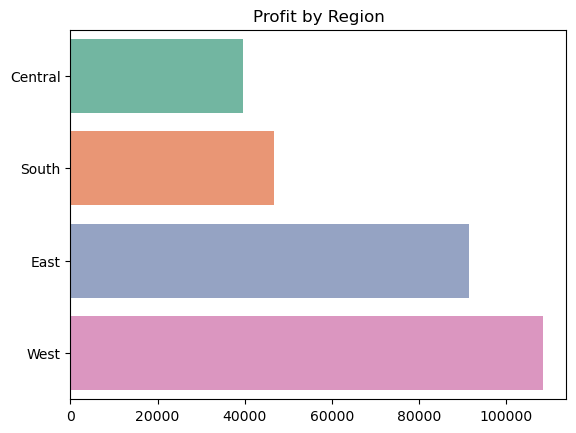

In [13]:
# Profit by Region
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
region = region_profit.values
profit = region_profit.index
sns.barplot(x = region , y = profit, hue = profit, palette = "Set2", legend = False)
plt.title('Profit by Region')
plt.ylabel('')
plt.savefig("region_profit.png", bbox_inches = "tight")
plt.show()

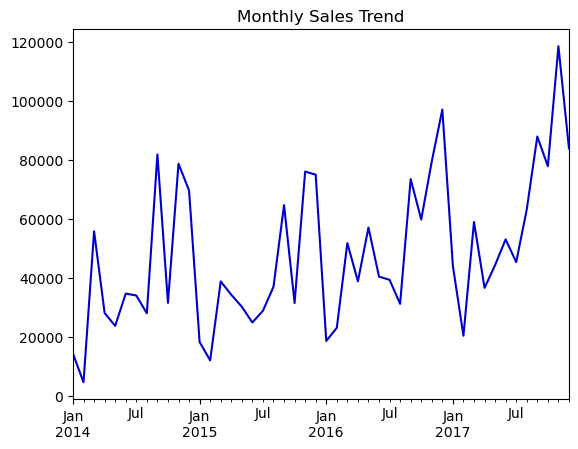

In [14]:
# Sales Trend Over Time

monthly_sales = df.set_index('Order Date').resample('ME')['Sales'].sum()
monthly_sales.plot(title = 'Monthly Sales Trend', color = 'mediumblue')
plt.xlabel('')
plt.savefig("monthly_sales.png", bbox_inches = "tight")
plt.show()

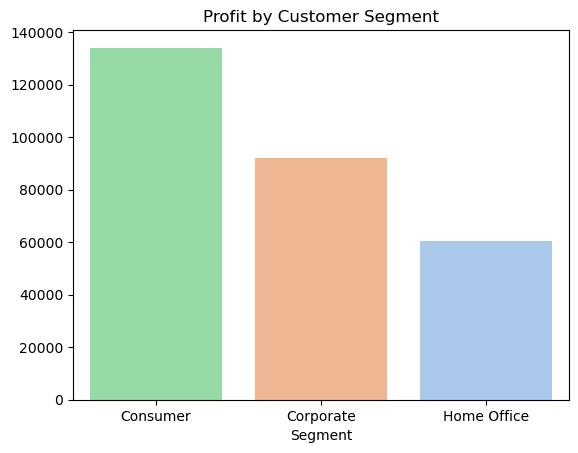

In [15]:
# Customer Segmentation

segment_profit = df.groupby('Segment')['Profit'].sum()
profit_index = segment_profit.index
profit_values = segment_profit.values
sns.barplot(x = profit_index, y = profit_values, hue = profit_values, palette = 'pastel', legend = False)
plt.title('Profit by Customer Segment')
plt.savefig("segment_profit.png", bbox_inches = "tight")
plt.show()

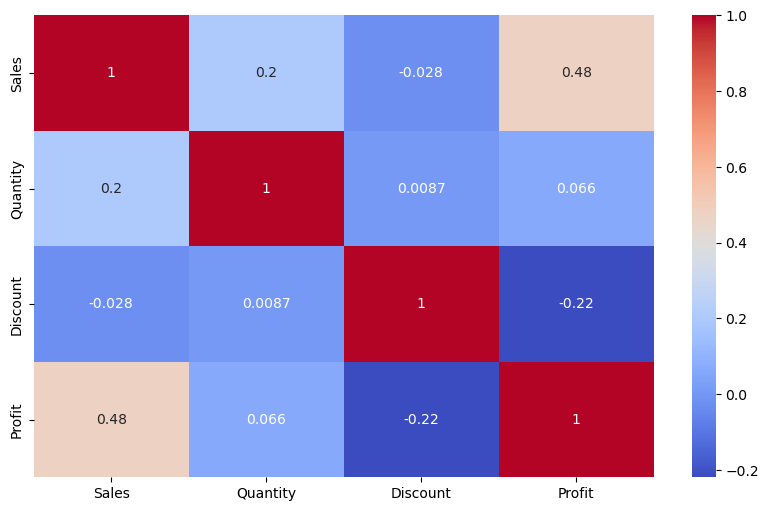

In [16]:
# Heatmap of Correlations

plt.figure(figsize=(10, 6))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot = True, cmap = 'coolwarm')
plt.savefig("heatmap_of_correlations.png", bbox_inches = "tight")
plt.show()